###### Content is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>, code under <a rel="license" href="http://opensource.org/licenses/MIT">MIT license</a> $(c)$2015 Jiasheng Yu.

# Sine-Gordon Equation in 2D

This notebook solve the Sine-Gordon Equation in 2D system with several different initial conditions. We still use scheme of "central-difference in both time and space", as the derivative terms are all in second-order.

## Introducing the new-form equation

As mentioned in the previous notebook for 1D problem, The 2D form of the Sine-Gordon Equation can be written as<br\><br\>
$$\frac{\partial^2 u}{\partial t^2}-\frac{\partial^2 u}{\partial x^2}-\frac{\partial^2 u}{\partial y^2}+\sin u=0$$<br\>
According to many reference papers studying this nonlinear PDE, there is another form of equation with damping:<br\><br\>
$$\frac{\partial^2 u}{\partial t^2}+\beta \frac{\partial u}{\partial t}-\frac{\partial^2 u}{\partial x^2}-\frac{\partial^2 u}{\partial y^2}+\sin u=0$$<br\>
where $\beta \geqslant 0$ is a damping parameter. <br\><br\>
In this notebook, we will use the special case $\beta=0$.

## Use explicit scheme to solve the 2D Sine-Gordon Equation

Just like the previous notebook for 1D problem, we start from writing down the second-order central-difference formula:<br\><br\>
$$\frac{u_{i,j}^{n+1}-2u_{i,j}^{n}+u_{i,j}^{n-1}}{\Delta t^2}-\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}-\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}+\sin u_{i,j}^{n}=0$$<br\>
Then solve for the $u_{i,j}^{n+1}$ term:<br\><br\>
$$u_{i,j}^{n+1}=2 u_{i,j}^{n}-u_{i}^{n-1}+\frac{\Delta t^2}{\Delta x^2}(u_{i+1,j}^{n}-2 u_{i,j}^{n}+u_{i-1,j}^{n})+\frac{\Delta t^2}{\Delta y^2}(u_{i,j+1}^{n}-2 u_{i,j}^{n}+u_{i,j-1}^{n})-\Delta t^2\sin u_{i,j}^{n}$$<br\>
Write $\frac{\Delta t^2}{\Delta x^2}=\alpha$ and $\frac{\Delta t^2}{\Delta y^2}=\beta$, then we have<br\><br\>
$$u_{i,j}^{n+1}=2 u_{i,j}^{n}-u_{i}^{n-1}+\alpha(u_{i+1,j}^{n}-2 u_{i,j}^{n}+u_{i-1,j}^{n})+\beta(u_{i,j+1}^{n}-2 u_{i,j}^{n}+u_{i,j-1}^{n})-\Delta t^2\sin u_{i,j}^{n}$$<br\>
$$=2(1-\alpha^2-\beta^2) u_{i,j}^{n}-u_{i,j}^{n-1}+\alpha^2(u_{i+1,j}^{n}+u_{i-1,j}^{n})+\beta^2(u_{i,j+1}^{n}+u_{i,j-1}^{n})-\Delta t^2\sin u_{i,j}^{n}$$<br\>

Similar as 1D problem, we need to solve the equation with 2 initial conditions:<br\><br\>
$$u(x,y,0)=f(x,y)$$<br\>$$\frac{\partial u(x,y,0)}{\partial t}=g(x,y)$$<br\>
Then we use the same method as 1D problem to obtain $u_{i,j}^{1}$:<br\><br\>
$$u_{i,j}^{1}=(1-\alpha^2-\beta^2)f(x_{i,j})+\frac{\alpha^2}{2}[f(x_{i+1,j}+f(x_{i-1,j})]+\frac{\beta^2}{2}[f(x_{i,j+1}+f(x_{i,j-1})]-\Delta t\cdot g(x,y)-\frac{\Delta t^2}{2}\sin[f(x_{i,j})]$$<br\>

### Stability

Similar as the 1D problem, the CFL condition for the 2D Sine-Gordon Equation should be<br\><br\>
$$0 \leq \alpha \text{ , }\beta \leq 1$$

## Problem setup

Consider an initial-value problem for the Sine-Gordon Equation in 2-D<br\><br\>
$$\frac{\partial^2 u}{\partial t^2}-\frac{\partial^2 u}{\partial x^2}-\frac{\partial^2 u}{\partial y^2}+\sin u=0$$<br\>
We will solve the equation over the region $-l \leq x \leq l$ and $-h \leq y \leq h$ with initial conditions<br\><br\>
$$u(x,y,0)=f(x,y) \text{ , } \frac{\partial u(x,y,0)}{\partial t}=g(x,y)$$<br\>
and with the no-flux Neumann boundary condition<br\><br\>
$$\frac{\partial u(\pm l,y,t)}{\partial x}=0 \text{ and } \frac{\partial u(x,\pm h,t)}{\partial y}=0$$

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
#%matplotlib notebook
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16
from numpy import sin,cos,exp,arctan,sqrt,pi,cosh
import matplotlib.pyplot as plt

### 1.  Superposition of two orthogonal line solitons

The initial conditions for this example are<br\><br\>
$$f(x,y)=4\arctan(e^x)+4\arctan(e^y)$$<br\>
$$g(x,y)=0$$

In [2]:
#Setup for the initial values for the equation
l=6.
h=6.
nx=121
ny=121
x=numpy.linspace(-l,l,nx)
y=numpy.linspace(-h,h,ny)
dx=2*l/(nx-1)
dy=2*h/(ny-1)
T=12.
dt=0.05
nt=int(T/dt)
alpha=dt/dx
beta=dt/dy

In [3]:
#Setup the initial conditions for the "superposition of two orthognal line solitons" problem
f_2orth=numpy.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        f_2orth[i,j]=4.*(arctan(exp(i*dx-l))+arctan(exp(j*dy-h)))
g_2orth=numpy.zeros((nx,ny))

For 2D problems, we will import 3D plots to see what our numerical solutions looks like.

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [5]:
def plot_3D(x, y, u):    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(-l,l)
    ax.set_ylim(-h,h)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(60,-45)

Then, plot the initial position $f(x,y)$ 

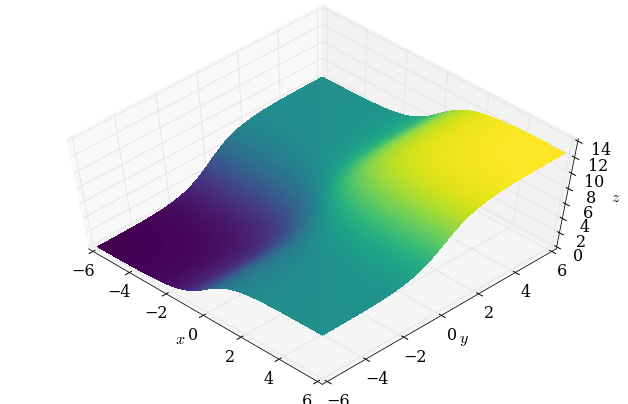

In [6]:
plot_3D(x,y,f_2orth)

In [7]:
#Defining the function for solving the Sine-Gordon Equation
def sinegordon2D(nt,dt,dx,dy,f,g,alpha,beta):
    u=numpy.zeros((nt,nx,ny))
    u[0,:,:]=f
    #Solving for u1
    u[1,1:-1,1:-1]=(1.-alpha**2-beta**2)*f[1:-1,1:-1]+.5*alpha**2*(u[0,2:,1:-1]+u[0,:-2,1:-1])+\
                   .5*beta**2*(u[0,1:-1,2:]+u[0,1:-1,:-2])-dt*g[1:-1,1:-1]-.5*dt**2*numpy.sin(f[1:-1,1:-1])
    
    #Enforce Neumann BCs at the first time step
    u[1,:,0]=u[1,:,1]
    u[1,:,-1]=u[1,:,-2]
    u[1,0,:]=u[1,1,:]
    u[1,-1,:]=u[1,-2,:]

    for t in range(1,nt-1):
        u[t+1,1:-1,1:-1]=(2.-2.*alpha**2-2.*beta**2)*u[t,1:-1,1:-1]-u[t-1,1:-1,1:-1]+\
                          alpha**2*(u[t,2:,1:-1]+u[t,:-2,1:-1])+beta**2*(u[t,1:-1,2:]+u[t,1:-1,:-2])-dt**2*numpy.sin(u[t,1:-1,1:-1])
        
        #Enforce Neumann BCs in the loop
        u[t+1,:,0]=u[t+1,:,1]
        u[t+1,:,-1]=u[t+1,:,-2]
        u[t+1,0,:]=u[t+1,1,:]
        u[t+1,-1,:]=u[t+1,-2,:]
        
    return u

Now, let's compute!

In [8]:
u_2orth=sinegordon2D(nt,dt,dx,dy,f_2orth,g_2orth,alpha,beta)

In [9]:
u3_2orth=u_2orth[int(3/dt-1),:,:] #The solution at t=3
u5_2orth=u_2orth[int(5/dt-1),:,:] #The solution at t=5

#### Numerical sulutions at t=3, t=5

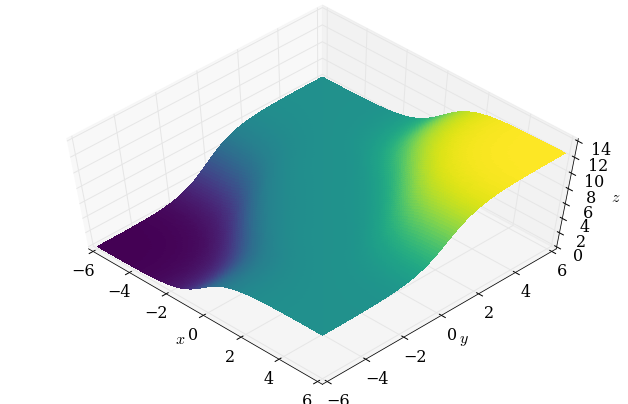

In [10]:
plot_3D(x,y,u3_2orth)

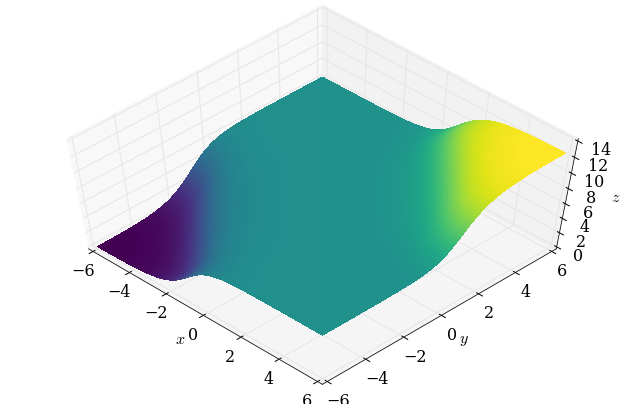

In [11]:
plot_3D(x,y,u5_2orth)

### 2. Elliptical breather

Initial conditions for this example are<br\><br\>
$$f(x,y)=4\arctan\left[\exp \left(3-\sqrt{\frac{(x-y)^2}{3}+\frac{(x+y)^2}{2}}\right)\right]$$<br\>
$$g(x,y)=0$$

In [12]:
#Setup the initial conditions for the "elliptical breather" problem
f_elbr=numpy.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        f_elbr[i,j]=4.*arctan(exp(3-sqrt(((i*dx-l)-(j*dy-h))**2/3+((i*dx-l)+(j*dy-h))**2/2)))
g_elbr=numpy.zeros((nx,ny))

Plot the initial position $f(x,y)$:

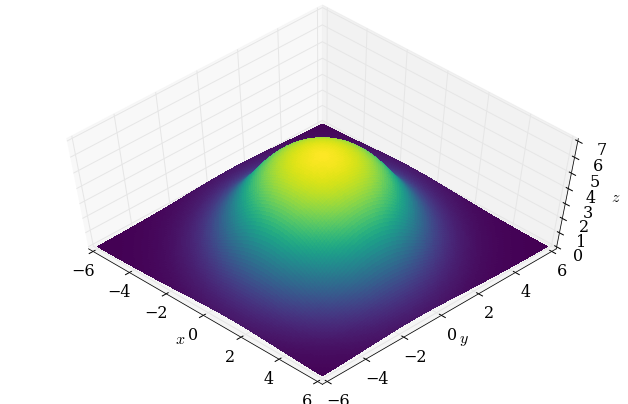

In [13]:
plot_3D(x,y,f_elbr)

In [14]:
u_elbr=sinegordon2D(nt,dt,dx,dy,f_elbr,g_elbr,alpha,beta)

In [15]:
u2_elbr=u_elbr[int(2/dt-1),:,:] #The solution at t=2
u4_elbr=u_elbr[int(4/dt-1),:,:] #The solution at t=4
u6_elbr=u_elbr[int(6/dt-1),:,:] #The solution at t=6

#### Numerical solutions at t=2, t=4, t=6

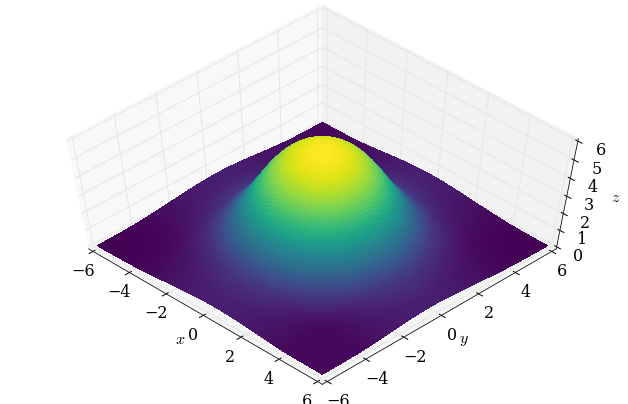

In [16]:
plot_3D(x,y,u2_elbr)

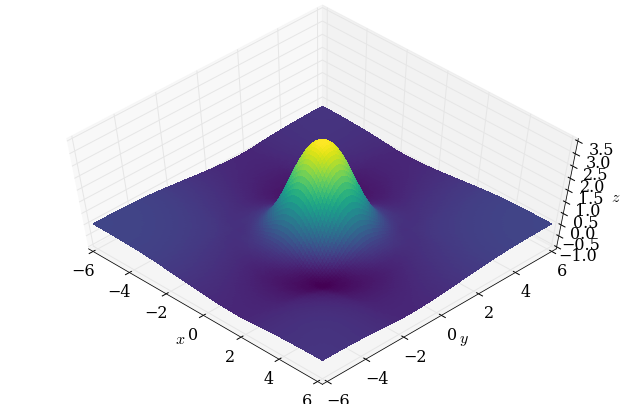

In [17]:
plot_3D(x,y,u4_elbr)

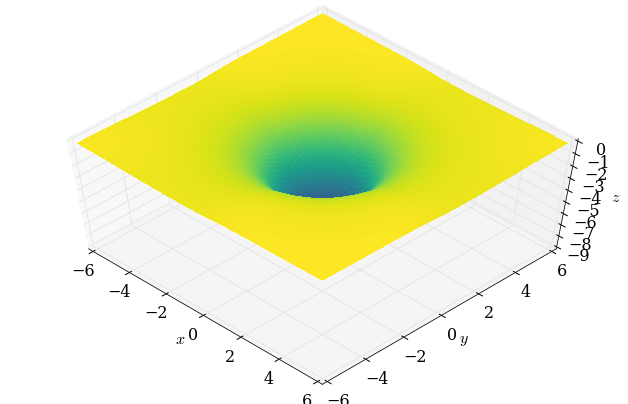

In [18]:
plot_3D(x,y,u6_elbr)

At t=6, the soliton has inverted its position!

<br\><br\>Now we will compute for colliding solitons which is a little complicated. The initial values for the problem need to change.

### 3. Collision of four circular solitons

For initial conditions of the colliding solitons, we have:<br\><br\>
$$f(x,y)=u(x,y,0)=\phi(x,y,a,b)+\phi(x,y,a,-b)+\phi(x,y,-a,b)+\phi(x,y,-a,-b)$$<br\>
$$g(x,y)=\frac{\partial}{\partial t}u(x,y,0)=\psi(x,y,a,b)+\psi(x,y,a,-b)+\psi(x,y,-a,b)+\psi(x,y,-a,-b)$$<br\>
where:<br\>
$$\phi(x,y,a,b)=4\arctan \left(\exp \left(\frac{1}{0.436}\left[4-\sqrt{(x-a)^2+(y-b)^2}\right]\right)\right),$$ <br\>
$$\psi(x,y,a,b)=\frac{4.13}{\cosh\left(\frac{1}{0.436}\left[4-\sqrt{(x-a)^2+(y-b)^2}\right]\right)}$$<br\>
For this problem, we need to change our model size a little bit.

In [19]:
#Setup for the new model
l=40.
h=40.
nx=161
ny=161
x=numpy.linspace(-l,l,nx)
y=numpy.linspace(-h,h,ny)
dx=2*l/(nx-1)
dy=2*h/(ny-1)
T=20.
dt=0.05
nt=int(T/dt)
alpha=dt/dx
beta=dt/dy

In [20]:
#Define the two functions for colliding solitons
def phi(x,y,a,b):
    return 4.*arctan(exp(1./0.436*(4-sqrt((x-a)**2+(y-b)**2))))
def psi(x,y,a,b):
    return 4.13/cosh(1./0.436*(4-sqrt((x-a)**2+(y-b)**2)))

In [21]:
#Evaluate a and b
a=5.
b=5.

In [22]:
#Set up the initial conditions for the "collision of four circular solitons" problem
f_4cir=numpy.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        f_4cir[i,j]=phi(i*dx-l,j*dy-h,a,b)+phi(i*dx-l,j*dy-h,a,-b)+phi(i*dx-l,j*dy-h,-a,b)+phi(i*dx-l,j*dy-h,-a,-b)
g_4cir=numpy.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        g_4cir[i,j]=psi(i*dx-l,j*dy-h,a,b)+psi(i*dx-l,j*dy-h,a,-b)+psi(i*dx-l,j*dy-h,-a,b)+psi(i*dx-l,j*dy-h,-a,-b)

Plot the initial position $f(x,y)$:

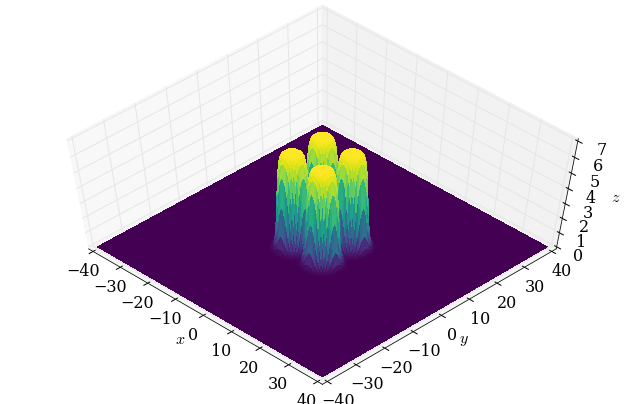

In [23]:
plot_3D(x,y,f_4cir)

In [24]:
u_4cir=sinegordon2D(nt,dt,dx,dy,f_4cir,g_4cir,alpha,beta)

In [25]:
u1_4cir=u_4cir[int(5/dt-1),:,:] #The solution at t=5
u2_4cir=u_4cir[int(10/dt-1),:,:] #The solution at t=10
u3_4cir=u_4cir[int(15/dt-1),:,:] #The solution at t=15

#### Numercal solutions at t=5, t=10, t=15

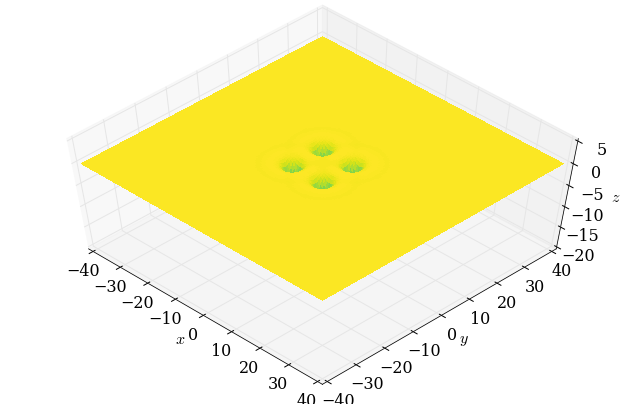

In [26]:
plot_3D(x,y,u1_4cir)

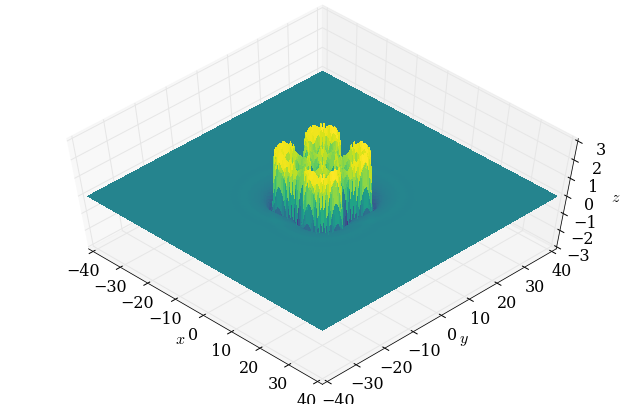

In [27]:
plot_3D(x,y,u2_4cir)

At t=10, the solitons start to collide! 

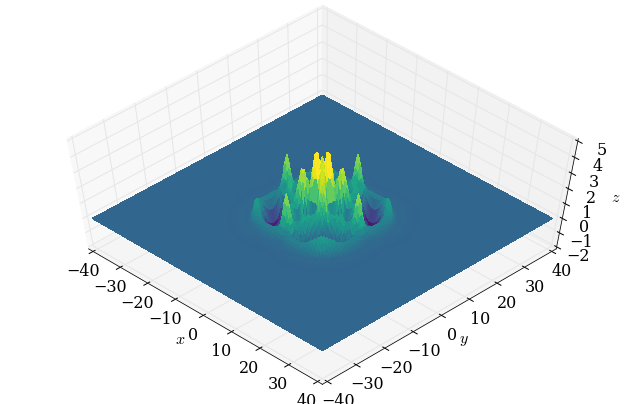

In [28]:
plot_3D(x,y,u3_4cir)

With the time increasing, the solitons expand wildly after colliding.

##### Dig Deeper

How will the solutions be like if considering the damping term $\beta \frac{\partial u}{\partial t}$? The Sine-Gordon Equation will become: <br\><br\>
$$\frac{\partial^2 u}{\partial t^2}+\beta \frac{\partial u}{\partial t}-\frac{\partial^2 u}{\partial x^2}-\frac{\partial^2 u}{\partial y^2}+\sin u=0$$<br\>
How will this damping term affect our numerical solution? 

## Reference

[1] *Sine-Gordon Equation*, Wikipidia, https://en.wikipedia.org/wiki/Sine-Gordon_equation<br\>
[2] Suarez, Pablo, Stephen Johnson, and Anjan Biswas. "Chebyshev split-step scheme for the sine-Gordon equation in 2+1 dimensions." Int. J. Nonlinear Sci. Numer. Simul. 14.1 (2013). <br\>
[3] Yin, Fukang, et al. "Spectral methods using Legendre wavelets for nonlinear Klein∖ Sine-Gordon equations." Journal of Computational and Applied Mathematics 275 (2015). http://mapleprimes.com/DocumentFiles/202856_question/1-s2.0-S0377042714003331-main.pdf<br\>
[4] Barba, Lorena A., et al. "MAE 6286 Practical Numerical Methods with Python." The George Washington University. http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/info<br\>